In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import sqlalchemy as sql
import sqlite3

import random

from category_encoders import OrdinalEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, fbeta_score, recall_score, confusion_matrix, accuracy_score, 
                             precision_recall_fscore_support, precision_score)

<h2>Load Data </h2>

In [3]:
#getting aw data and storing in a sqlite database]
engine = sql.create_engine("sqlite:///telco.db")
conn = sqlite3.connect('telco.db')
data = pd.read_sql('select * from preprocessed_data', engine)

In [4]:
print(f'num rows: {data.shape[0]} \nnum columns:  {data.shape[1]}')

num rows: 7032 
num columns:  21


In [5]:
sns.set_style("whitegrid")

* The priority is f2 scores so we will find a way to increase our f2 as much as possible

* so we will bring in all our data including categorical ones, then make dummies for it

In [6]:
data.drop('index', axis=1, inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [8]:
# # let make coppy of the main data and pre-process the copied one
# data['Churn'] = np.where(data.Churn == 'Yes',1,0)
# full_data = data.copy()
# full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [29]:
# full_data = pd.get_dummies(full_data, drop_first = True)
# full_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


* we can take a look at our feature correlation

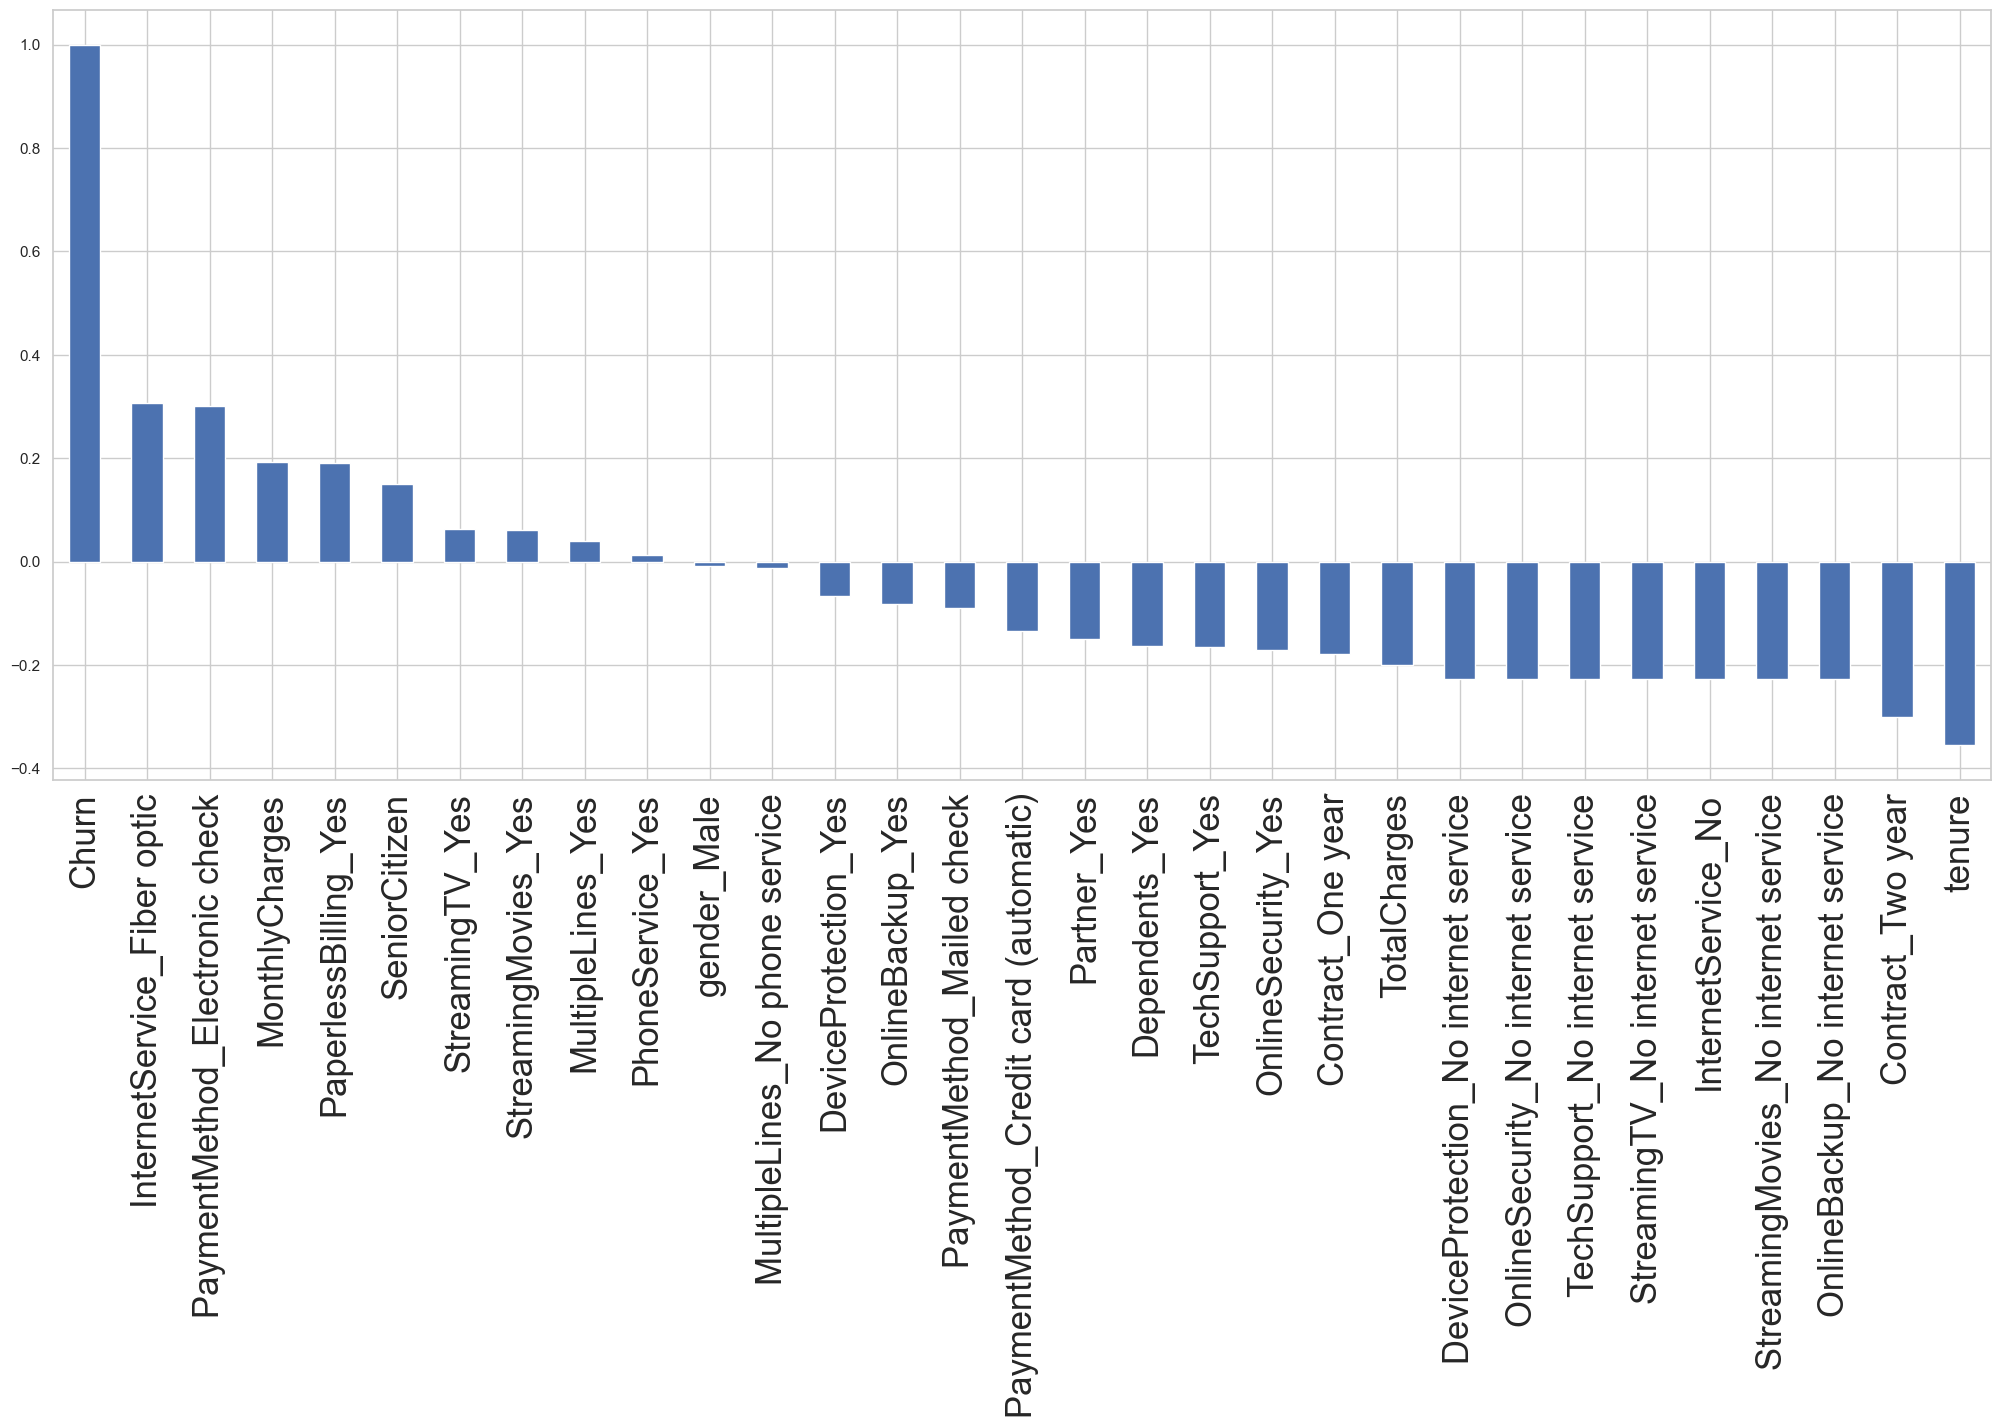

In [30]:

# plt.figure(figsize=(25,10))
# ax = full_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
# plt.xticks(fontsize=25, rotation=90);
# # plt.savefig('./pics/corr.png');

In [31]:
full_data.shape

(7032, 31)

* ##  Now lets start modeling with this data

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [10]:
X = data.drop('Churn', axis=1)
y = data["Churn"]

In [ ]:
X['SeniorCitizen'] = X['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [25]:
numeric_colummns= X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_colummns= X.select_dtypes(include=['object']).columns.tolist()
features = categorical_colummns + numeric_colummns
X = X[features]
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,24,84.80,1990.50
7028,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),72,103.20,7362.90
7029,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,11,29.60,346.45
7030,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,4,74.40,306.60


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.2, random_state=42)

In [29]:
le = OrdinalEncoder(cols=categorical_colummns)
le.fit(x_train[categorical_colummns])

x_train[categorical_colummns] = le.transform(x_train[categorical_colummns])
x_val[categorical_colummns] = le.transform(x_val[categorical_colummns])
x_test[categorical_colummns] = le.transform(x_test[categorical_colummns])

x_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
5212,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,65,107.45,7047.50
5491,2,2,1,1,1,2,2,2,1,1,1,2,2,2,2,2,60,60.50,3694.45
4512,2,2,1,1,1,2,3,3,2,2,2,3,3,3,2,2,1,19.95,19.95
5116,1,2,1,1,1,2,3,3,2,2,2,3,3,2,2,3,25,20.10,486.05
5317,2,2,1,1,1,2,3,3,2,2,2,3,3,3,1,1,15,20.00,288.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,1,1,1,2,1,2,1,2,1,3,1,2,1,1,2,4,69,87.30,6055.55
2733,1,2,1,1,1,2,2,2,3,1,1,1,1,2,2,2,43,75.20,3254.35
3120,2,2,2,2,1,2,3,3,2,2,2,3,3,3,2,3,4,19.00,78.90
1636,2,2,1,2,1,1,2,2,1,1,3,1,1,2,1,2,72,87.10,6230.10


In [30]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4500, 19), (4500,), (1125, 19), (1125,), (1407, 19), (1407,))

In [31]:
clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)
val_preds= clf.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, val_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, val_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, val_preds)

Val Recall score: 0.5577557755775577 
Val F2 score: 0.5740489130434783 

 val confusion_matrix:


array([[731,  91],
       [134, 169]])

In [32]:
accuracy_score(y_val, val_preds)

0.8

### Lets do the same with CV

In [33]:
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_cv = LogisticRegressionCV(cv=kf, random_state=42, Cs=c_list)
clf_cv.fit(x_train, y_train)
cv_preds= clf_cv.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, cv_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, cv_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, cv_preds)

Val Recall score: 0.5676567656765676 
Val F2 score: 0.5826558265582655 

 val confusion_matrix:


array([[730,  92],
       [131, 172]])

In [34]:
accuracy_score(y_val, cv_preds)

0.8017777777777778

In [35]:
clf_cv.C_

array([0.1024024])

* #### So we can see above that there is a slight improvement from regular to cv but not too much

* ### now we can focus on some class imbalance techniques

  1. Lests start with threshold adjustment 


In [41]:
# packages needed for this notebook: MLXTEND, IMBALANCED-LEARN
# !pip install mlxtend
# !conda install -c conda-forge imbalanced-learn -y

Logistic Regression Model best F2 score 0.758 at prob decision threshold >= 0.151


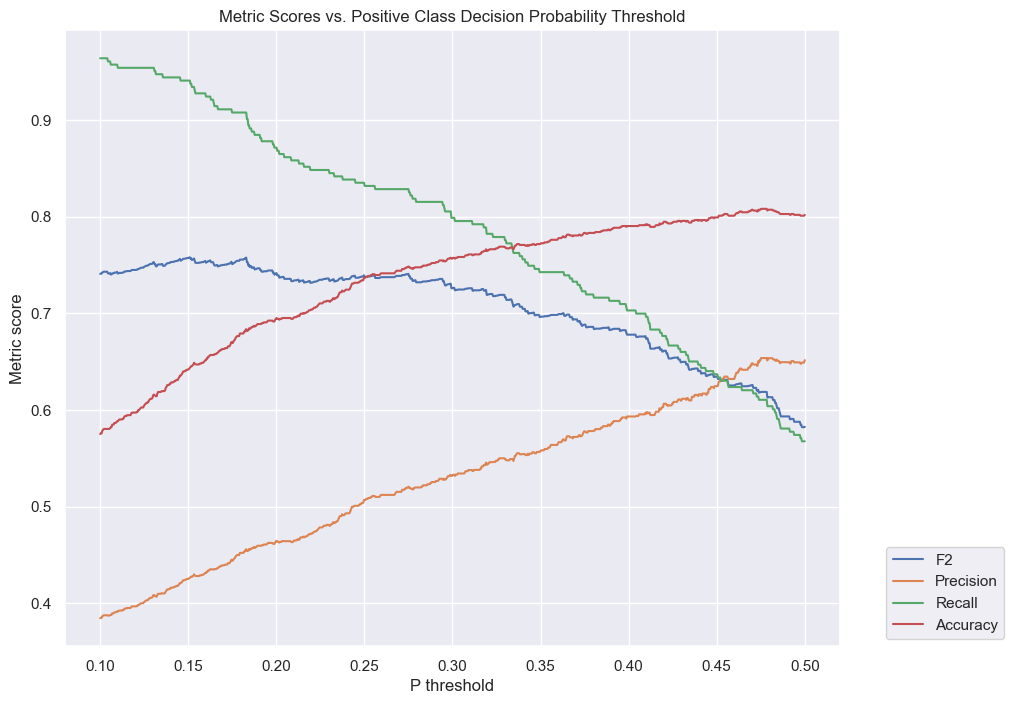

In [36]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_cv.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* So I can get an F2 score of .770 with a threshold of .196, but im not quite satisfied yet, I will go ahead and try oversampling first before adjusting threshold

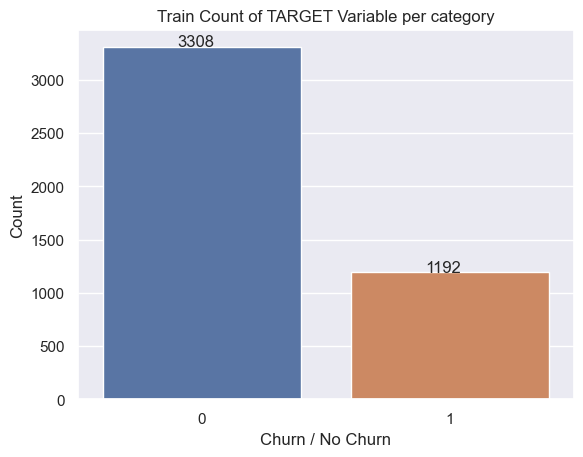

In [37]:
ax = sns.countplot(x= y_train)
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Train Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

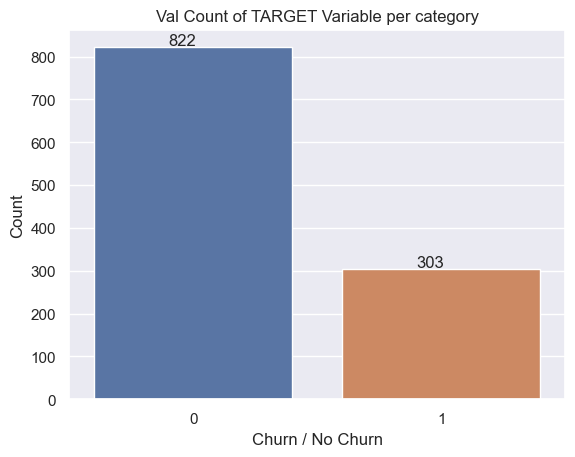

In [38]:
ax = sns.countplot(x= y_val )
plt.title("Val Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

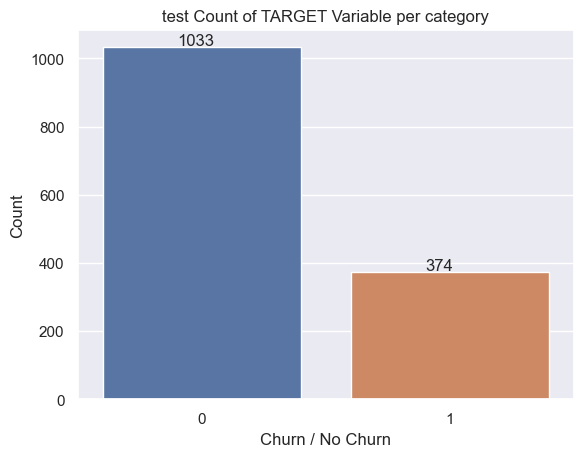

In [39]:
ax = sns.countplot(x= y_test)
plt.title("test Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [40]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [41]:
x_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(x_train, y_train)

In [42]:
Counter(y_train)

Counter({0: 3308, 1: 1192})

In [43]:
Counter(y_adasyn)

Counter({0: 3308, 1: 3315})

In [44]:
# fit log reg with adasyn data
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_adasyn = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_adasyn.fit(x_adasyn, y_adasyn)
ada_preds= clf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, ada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_preds)

Val Recall score: 0.8085808580858086 
Val F2 score: 0.7335329341317365 

 val confusion_matrix:


array([[609, 213],
       [ 58, 245]])

* #### Now lets adjust threshold with this model

Logistic Regression Model best F2 score 0.748 at prob decision threshold >= 0.315


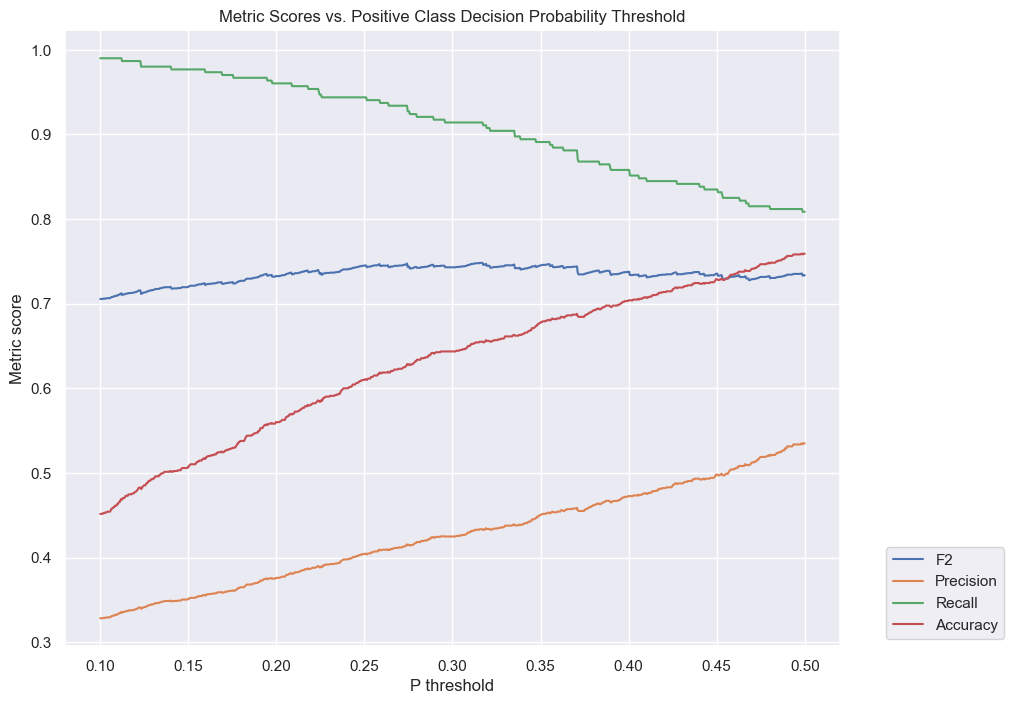

In [46]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')



print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* Here we are doing a little worse than just the threshold adjusting

* ### Why dont we Try SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
x_smoted, y_smoted = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [48]:
Counter(y_smoted)

Counter({0: 3308, 1: 3308})

In [49]:
# fit log reg with smote data
c_list = np.linspace(.10,10,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_smt = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_smt.fit(x_smoted, y_smoted)
smt_preds= clf_smt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, smt_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, smt_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, smt_preds)

Val Recall score: 0.7953795379537953 
Val F2 score: 0.7298606904906119 

 val confusion_matrix:


array([[624, 198],
       [ 62, 241]])

In [50]:
clf_smt.C_

array([3.04324324])

In [51]:
accuracy_score(y_val,smt_preds )

0.7688888888888888

Logistic Regression Model best F2 score 0.752 at prob decision threshold >= 0.229


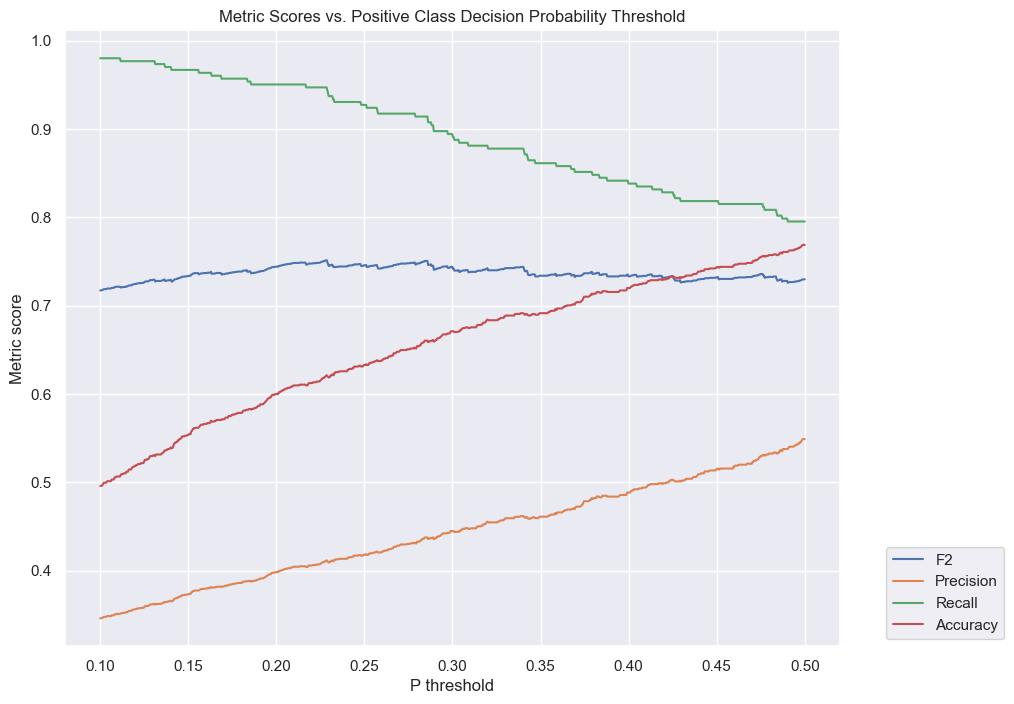

In [52]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_smt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* still stand alone threshold adjustment leading with Log reg

In [53]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%config InlineBackend.figure_formats = ['svg']  # or 'retina'

from sklearn.metrics import fbeta_score, make_scorer

In [65]:
# X = full_data.drop('Churn', axis=1)
# y = full_data["Churn"]
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [54]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
f2_scorer = make_scorer(fbeta_score, beta=2)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)

print(scores)

[0.49209139 0.46819788 0.4293381  0.56131261 0.45132743 0.44973545
 0.51483421 0.48415493 0.55183946 0.46017699]


In [55]:
# search for an optimal value of K for KNN
k_range = list(range(1, 41))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)
    k_scores.append(scores.mean())

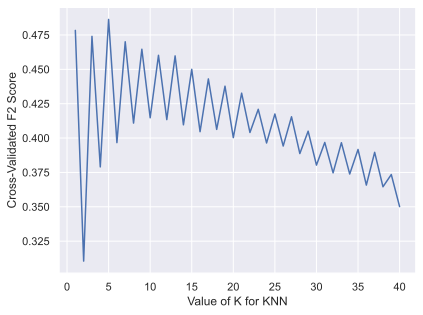

In [56]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F2 Score')
# plt.savefig('./pics/knn.png')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 100))
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring= f2_scorer)

# fit the grid with data
grid.fit(x_train, y_train);

In [58]:
# view the complete results
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001516,0.000693,0.009864,0.002666,1,{'n_neighbors': 1},0.512397,0.462185,0.462329,0.516949,0.410256,0.475000,0.431894,0.508333,0.512195,0.491525,0.478306,0.034916,2
1,0.001029,0.000105,0.008048,0.000779,2,{'n_neighbors': 2},0.308411,0.281426,0.323810,0.332700,0.285714,0.285171,0.296846,0.394495,0.368421,0.228137,0.310513,0.044895,68
2,0.001132,0.000353,0.009740,0.004996,3,{'n_neighbors': 3},0.445026,0.406360,0.435943,0.535406,0.440415,0.448276,0.505051,0.527682,0.555556,0.440141,0.473985,0.049058,3
3,0.000978,0.000134,0.008174,0.000553,4,{'n_neighbors': 4},0.394495,0.361781,0.347092,0.381750,0.369004,0.317757,0.394495,0.400729,0.480769,0.342593,0.379047,0.042199,33
4,0.000951,0.000059,0.008621,0.001290,5,{'n_neighbors': 5},0.492091,0.468198,0.429338,0.561313,0.451327,0.449735,0.514834,0.484155,0.551839,0.460177,0.486301,0.041940,1


In [59]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 5}
Best estimator:  KNeighborsClassifier()
Best score:  0.4863008454869102


* KNN is doing quite badly with all we tried

* ### Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dt_pred)} ')
print(f'Val F2 score: {fbeta_score(y_val, dt_pred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dt_pred)

Val Recall score: 0.5577557755775577 
Val F2 score: 0.5717185385656293 

 val confusion_matrix:


array([[725,  97],
       [134, 169]])

In [62]:
dt_tpred=dt.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, dt_tpred)} ')
print(f'Val F2 score: {fbeta_score(y_test, dt_tpred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, dt_tpred)

Val Recall score: 0.5053475935828877 
Val F2 score: 0.5198019801980198 

 val confusion_matrix:


array([[900, 133],
       [185, 189]])

In [77]:
#lets check with adasyn

Decision Model best F2 score 0.743 at prob decision threshold >= 0.258


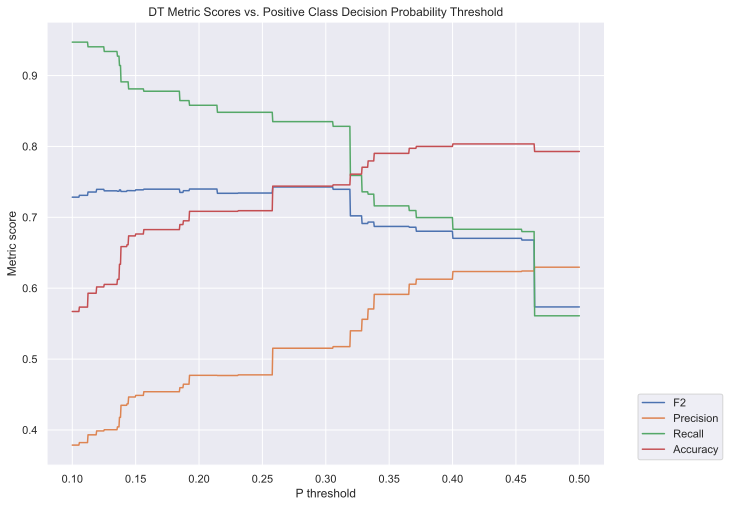

In [63]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('DT Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Decision Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [64]:
# fit log reg with adasyn data

dt_adasyn=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=9, min_samples_leaf=10)
dt_adasyn.fit(x_adasyn, y_adasyn)
dtada_preds= dt_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dtada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, dtada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dtada_preds)

Val Recall score: 0.7062706270627063 
Val F2 score: 0.6560392397302269 

 val confusion_matrix:


array([[617, 205],
       [ 89, 214]])

Logistic Regression Model best F2 score 0.718 at prob decision threshold >= 0.188


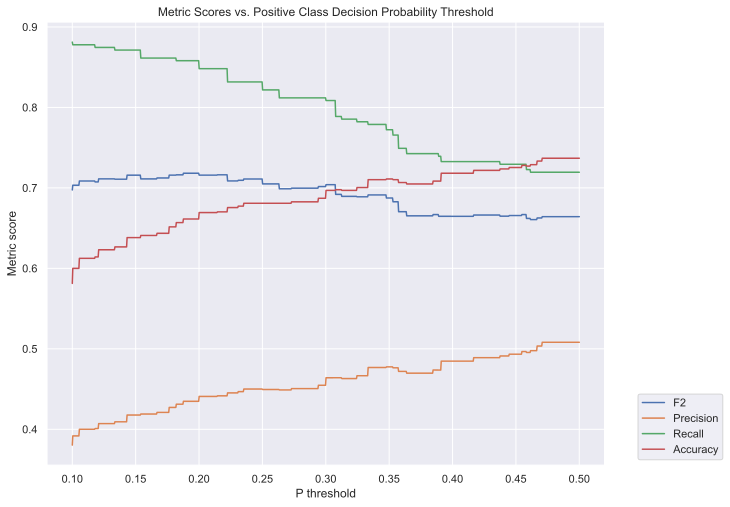

In [65]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

DT Model best test F2 score 0.724 at prob decision threshold >= 0.111


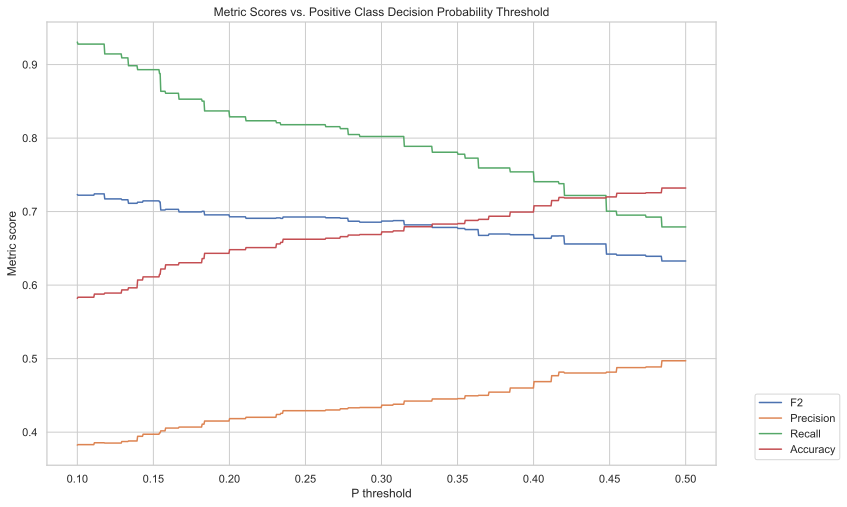

In [77]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = dt_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('DT Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [66]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=12)
rf_model.fit(x_train,y_train)
rf_preds=rf_model.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rf_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rf_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rf_preds)

Val Recall score: 0.5115511551155115 
Val F2 score: 0.5378209576682859 

 val confusion_matrix:


array([[748,  74],
       [148, 155]])

Base RF Model best F2 score 0.763 at prob decision threshold >= 0.181


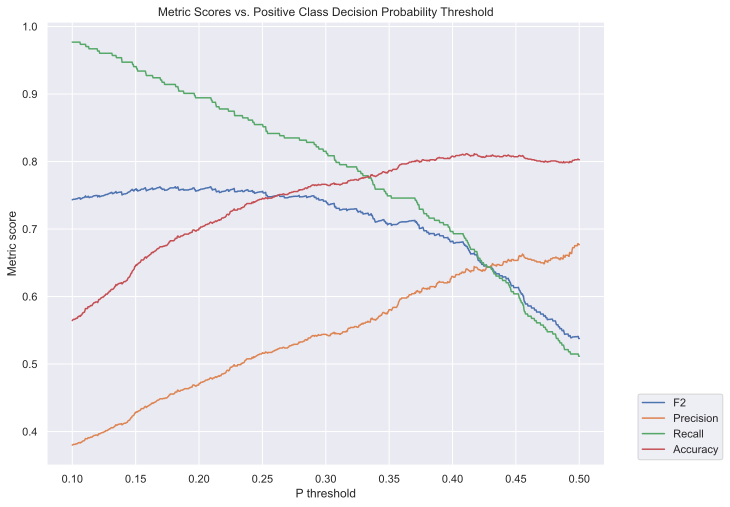

In [67]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_model.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Base RF Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF Model best test F2 score 0.744 at prob decision threshold >= 0.137


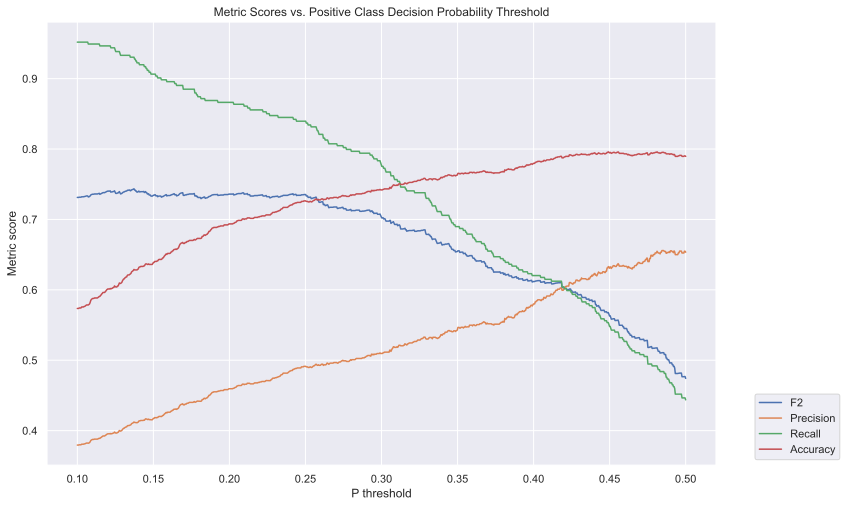

In [68]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_model.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

print('RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [69]:

rf_adasyn=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=5, min_samples_leaf=12)
rf_adasyn.fit(x_adasyn, y_adasyn)
rfada_preds= rf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rfada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rfada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rfada_preds)

Val Recall score: 0.8118811881188119 
Val F2 score: 0.7321428571428571 

 val confusion_matrix:


array([[600, 222],
       [ 57, 246]])

RF ADASYN Model best F2 score 0.766 at prob decision threshold >= 0.420


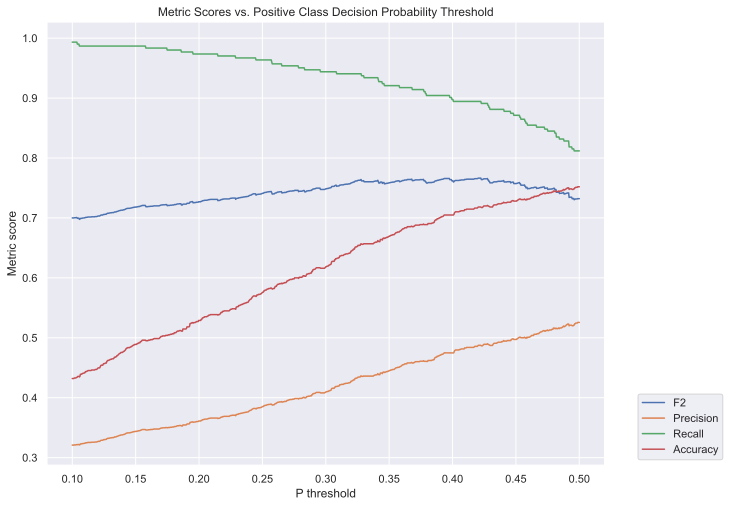

In [70]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('RF ADASYN Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF ADYSYN best test F2 score 0.736 at prob decision threshold >= 0.316


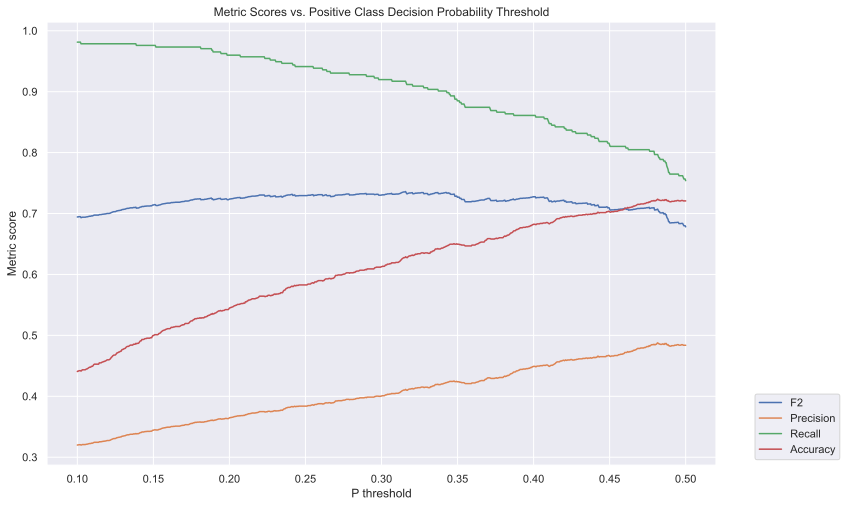

In [71]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

print('RF ADYSYN best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [72]:
%config InlineBackend.figure_formats = ['retina']

import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix 

In [73]:

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric=["logloss", 'aucpr'], ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=50,
            # eval_metric='aucpr',
            eval_set=[(x_val, y_val)])
            

fbeta_score(y_test, clf_xgb.predict(x_test, ntree_limit=clf_xgb.best_ntree_limit), beta=2) 

[0]	validation_0-logloss:0.57968	validation_0-aucpr:0.63391
[1]	validation_0-logloss:0.51714	validation_0-aucpr:0.65137
[2]	validation_0-logloss:0.47933	validation_0-aucpr:0.65439
[3]	validation_0-logloss:0.45471	validation_0-aucpr:0.66060
[4]	validation_0-logloss:0.43906	validation_0-aucpr:0.66656
[5]	validation_0-logloss:0.42831	validation_0-aucpr:0.66873
[6]	validation_0-logloss:0.42070	validation_0-aucpr:0.67260
[7]	validation_0-logloss:0.41849	validation_0-aucpr:0.66873
[8]	validation_0-logloss:0.41423	validation_0-aucpr:0.67452
[9]	validation_0-logloss:0.41423	validation_0-aucpr:0.67009
[10]	validation_0-logloss:0.41479	validation_0-aucpr:0.66954
[11]	validation_0-logloss:0.41574	validation_0-aucpr:0.67111
[12]	validation_0-logloss:0.41873	validation_0-aucpr:0.66440
[13]	validation_0-logloss:0.41835	validation_0-aucpr:0.66510
[14]	validation_0-logloss:0.41836	validation_0-aucpr:0.66596
[15]	validation_0-logloss:0.41816	validation_0-aucpr:0.66740
[16]	validation_0-logloss:0.41855	

0.4957983193277311

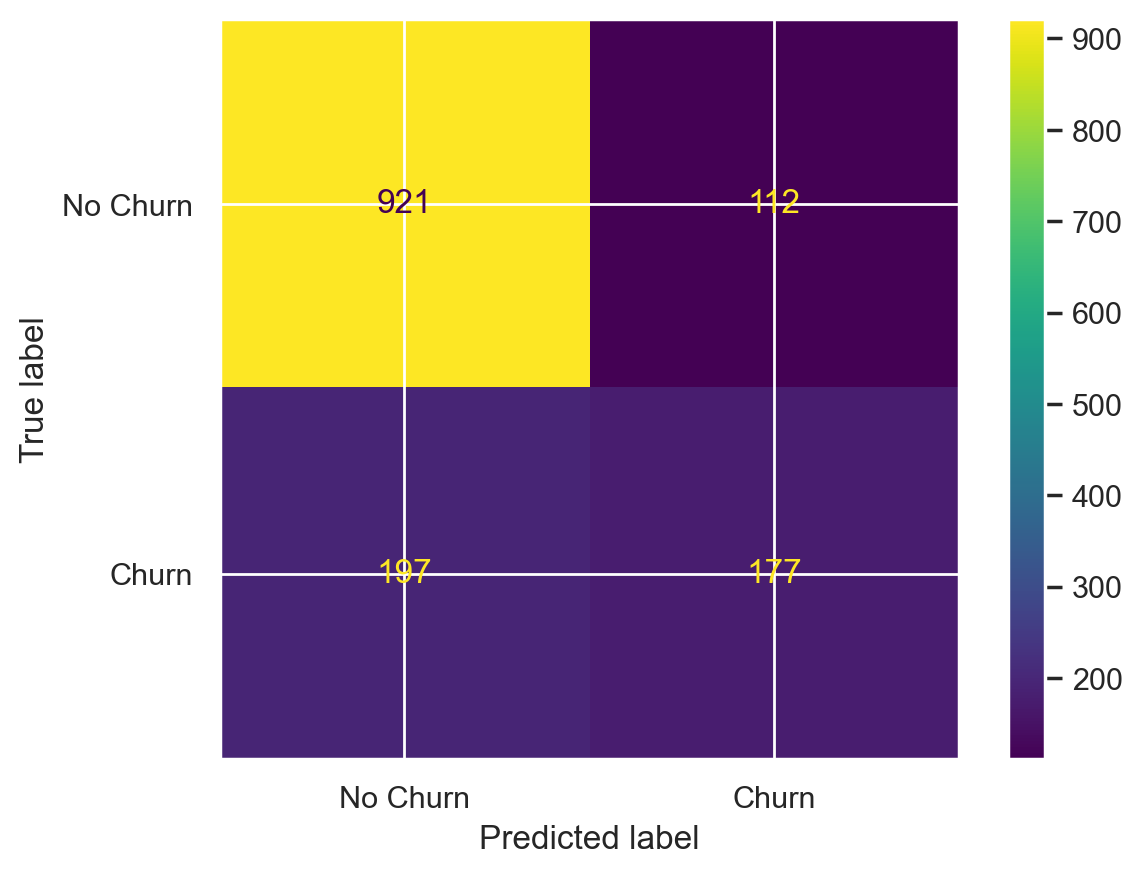

In [74]:
plot_confusion_matrix(clf_xgb, 
                      x_test, 
                      y_test,
                      values_format='d',
                      display_labels=["No Churn", "Churn"])

In [75]:
## 
## I ran GridSearchCV sequentially on subsets of parameter options, rather than all at once
## in order to optimize parameters in a short period of time.

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [.5, 1, 3] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output: 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1
## ROUND 2
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [.05, 0.1, 0.5],
    'gamma': [0.5, 1, 1.25],
    'reg_lambda': [5,7,10.0,],
     'scale_pos_weight': [ .5, 1, 3]
}
## Output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10.


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric=["logloss",'auc'], ## this avoids a warning...
                                early_stopping_rounds=10,
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_train, 
                   y_train, 
                                   
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 5, 'scale_pos_weight': 0.5}


After testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `gamma=1`, `learn_rate=0.1`, `max_depth=3`, and `reg_lambda=10`.

In [76]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric=["logloss", 'aucpr'], ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_set=[(x_val, y_val)])

xgb_preds=clf_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, xgb_preds)

[0]	validation_0-logloss:0.66651	validation_0-aucpr:0.57450
[1]	validation_0-logloss:0.64398	validation_0-aucpr:0.64358
[2]	validation_0-logloss:0.62394	validation_0-aucpr:0.64495
[3]	validation_0-logloss:0.60770	validation_0-aucpr:0.64189
[4]	validation_0-logloss:0.59340	validation_0-aucpr:0.64608
[5]	validation_0-logloss:0.58412	validation_0-aucpr:0.64846
[6]	validation_0-logloss:0.57258	validation_0-aucpr:0.65084
[7]	validation_0-logloss:0.56432	validation_0-aucpr:0.65142
[8]	validation_0-logloss:0.55975	validation_0-aucpr:0.65072
[9]	validation_0-logloss:0.55198	validation_0-aucpr:0.66293
[10]	validation_0-logloss:0.54819	validation_0-aucpr:0.66251
[11]	validation_0-logloss:0.54295	validation_0-aucpr:0.66179
[12]	validation_0-logloss:0.53722	validation_0-aucpr:0.66127
[13]	validation_0-logloss:0.53314	validation_0-aucpr:0.66700
[14]	validation_0-logloss:0.52953	validation_0-aucpr:0.66656
[15]	validation_0-logloss:0.52558	validation_0-aucpr:0.66605
[16]	validation_0-logloss:0.52131	

array([[584, 238],
       [ 50, 253]])

XGBoost Model best F2 score 0.766 at prob decision threshold >= 0.353


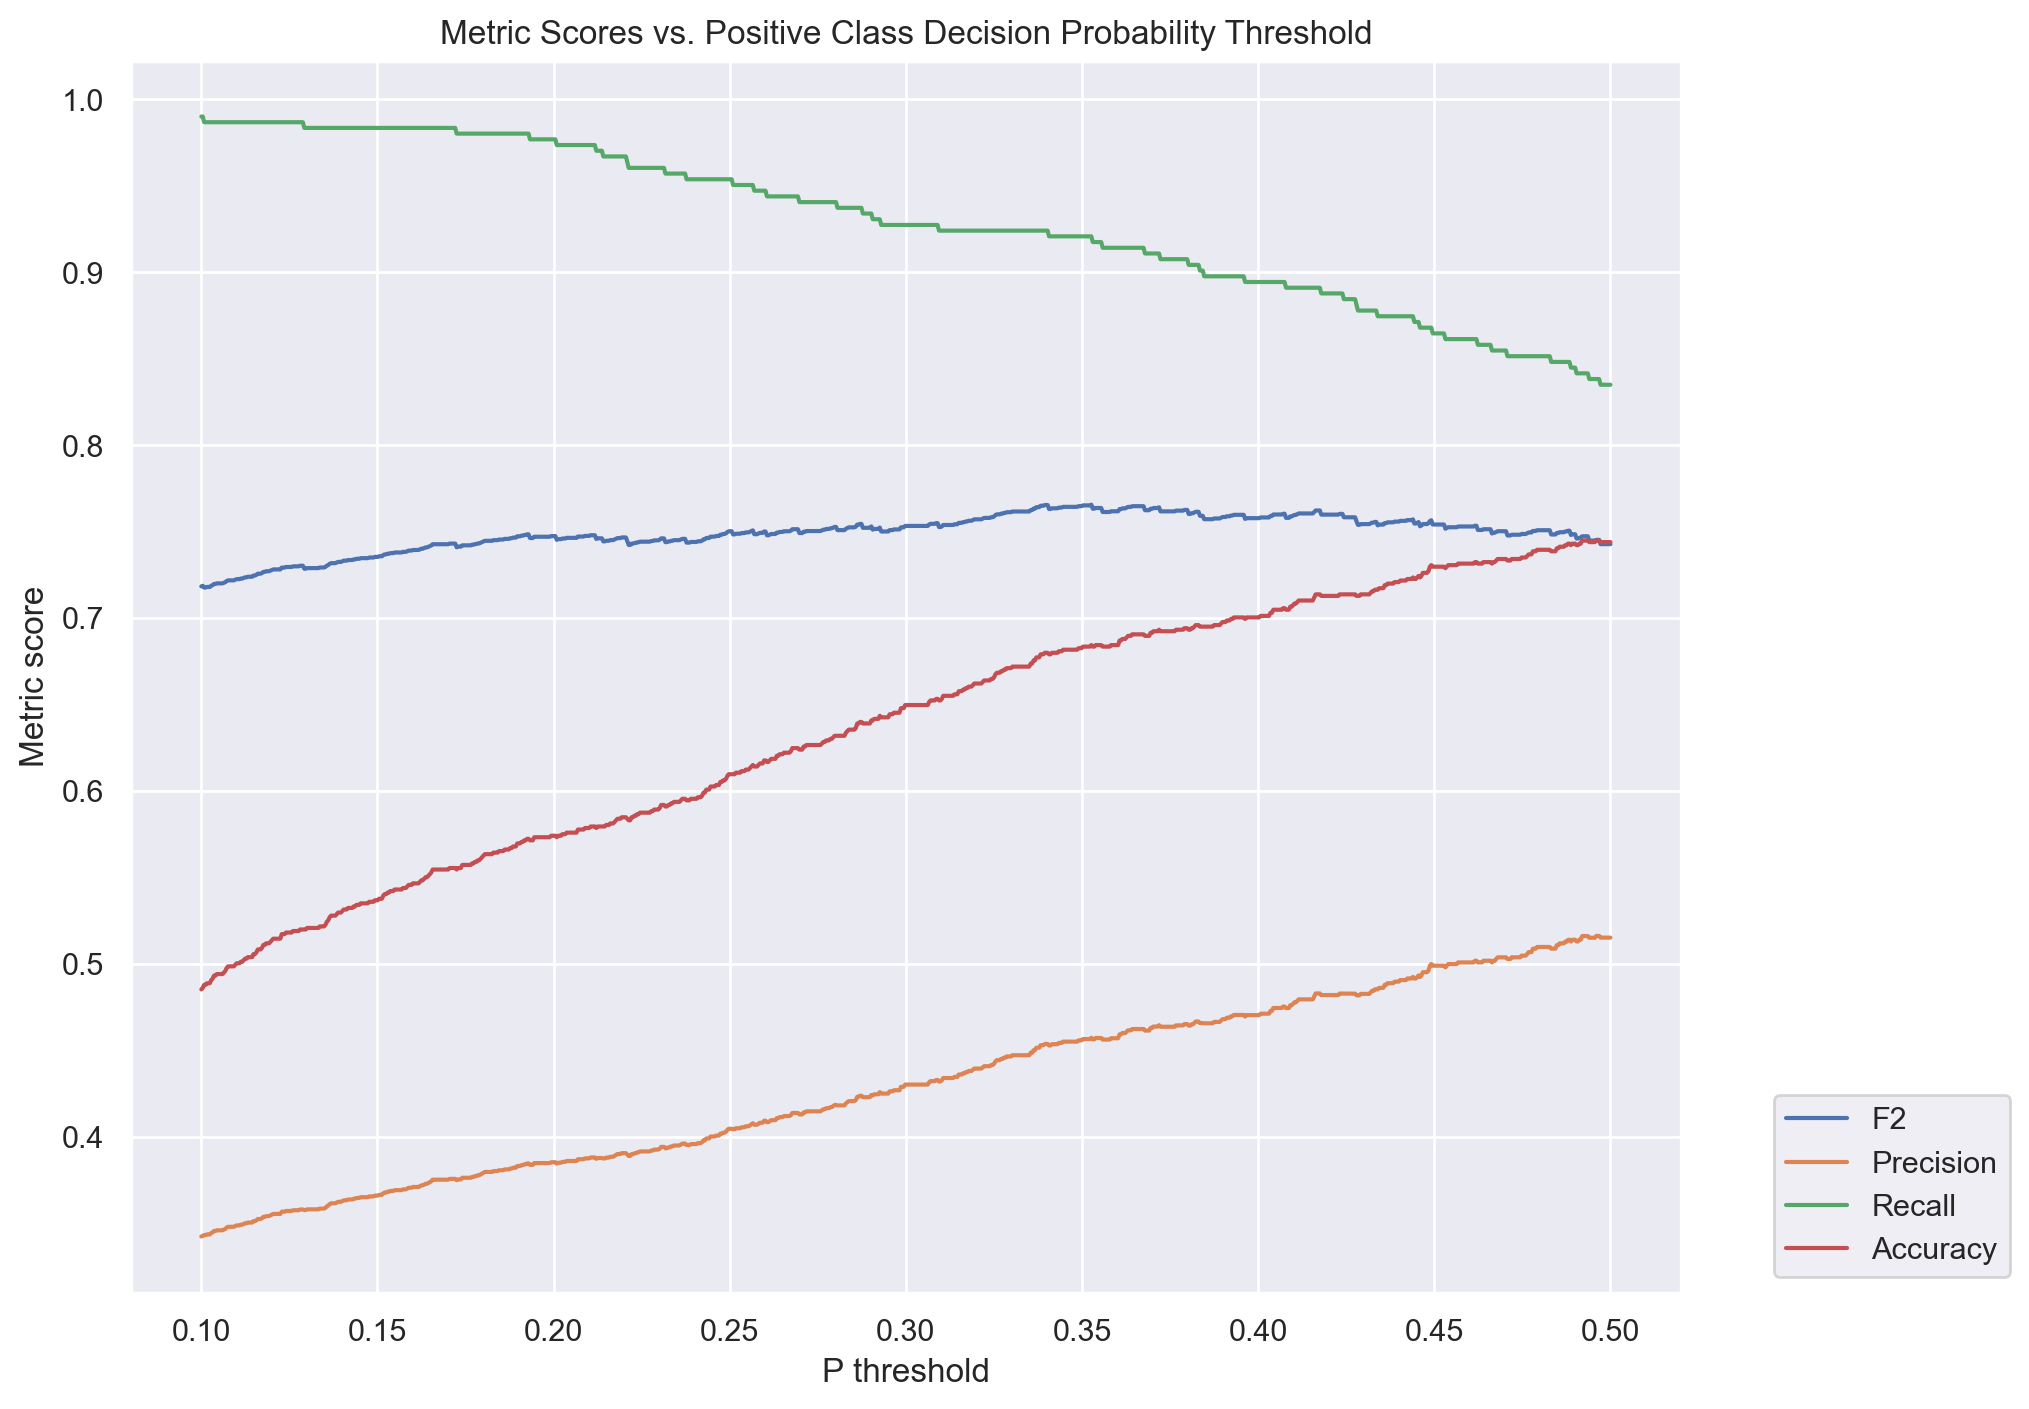

In [77]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('XGBoost Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

XGBoost best test F2 score 0.745 at prob decision threshold >= 0.339


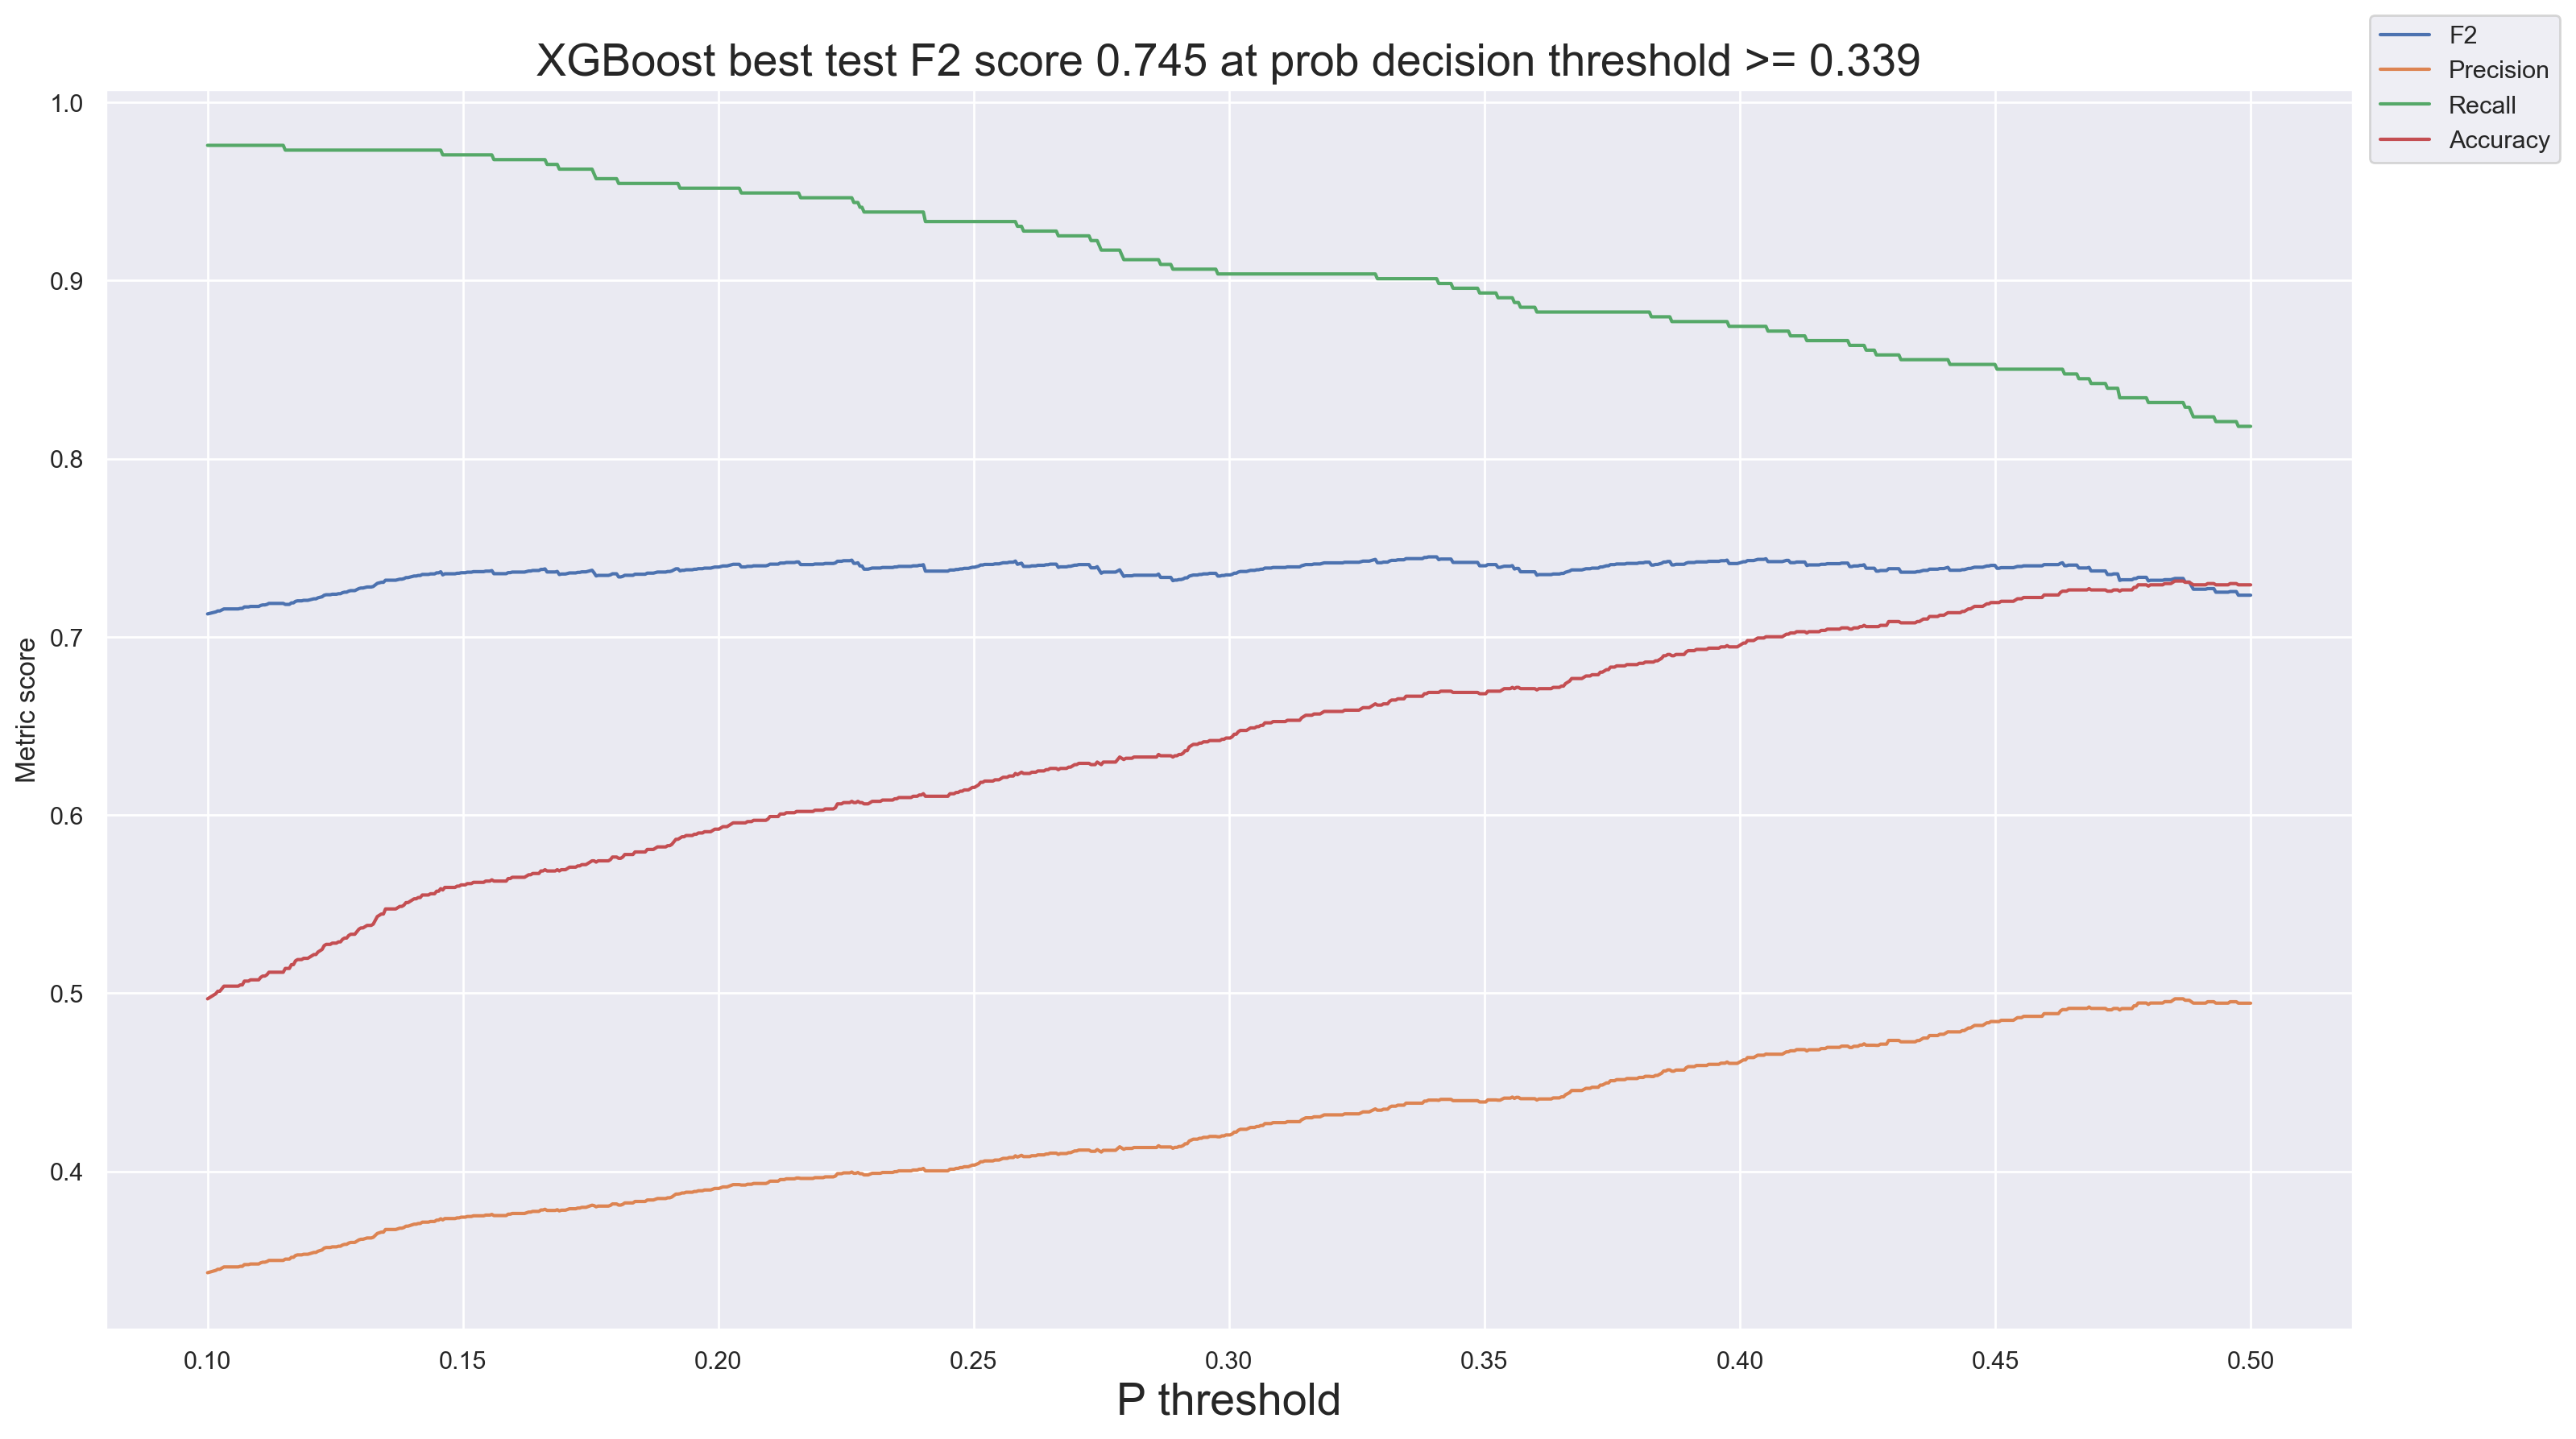

In [78]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = clf_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(18,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p),fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold',fontdict={'size': 20})
plt.ylabel('Metric score')
# plt.savefig('./pics/xgbtest.png')


print('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### ok lets visit Adasyn now

In [79]:
## First lets find optimal parameters

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3,5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output1: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}

# Because most of our params were at the end were at the ends of their range, we will continue to those...

## ROUND 2
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [.01, 0.1, 1],
    'gamma': [0.25, .5, 1],
    'reg_lambda': [0,0.5,1.0,],
     'scale_pos_weight': [1, 3,5]
}
## Output2: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric=["logloss",'auc'], ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                early_stopping_rounds=10,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_adasyn, 
                   y_adasyn, 
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1, 'learning_rate': 1, 'max_depth': 3, 'reg_lambda': 0.5, 'scale_pos_weight': 1}


In [80]:
ada_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric=["logloss",'aucpr'], ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=0,
                        early_stopping_rounds=50,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
ada_xgb.fit(x_adasyn, 
            y_adasyn, 
            verbose=True, 
            eval_set=[(x_val, y_val)])

ada_xgb_preds=ada_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, ada_xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_xgb_preds)

[0]	validation_0-logloss:0.67941	validation_0-aucpr:0.56555
[1]	validation_0-logloss:0.67529	validation_0-aucpr:0.58179
[2]	validation_0-logloss:0.66977	validation_0-aucpr:0.59608
[3]	validation_0-logloss:0.66759	validation_0-aucpr:0.60232
[4]	validation_0-logloss:0.65999	validation_0-aucpr:0.59886
[5]	validation_0-logloss:0.65699	validation_0-aucpr:0.58714
[6]	validation_0-logloss:0.64977	validation_0-aucpr:0.59905
[7]	validation_0-logloss:0.64578	validation_0-aucpr:0.60969
[8]	validation_0-logloss:0.64590	validation_0-aucpr:0.61390
[9]	validation_0-logloss:0.64458	validation_0-aucpr:0.61486
[10]	validation_0-logloss:0.64182	validation_0-aucpr:0.62166
[11]	validation_0-logloss:0.64168	validation_0-aucpr:0.62084
[12]	validation_0-logloss:0.63940	validation_0-aucpr:0.62233
[13]	validation_0-logloss:0.64250	validation_0-aucpr:0.61990
[14]	validation_0-logloss:0.64276	validation_0-aucpr:0.62284
[15]	validation_0-logloss:0.64085	validation_0-aucpr:0.63536
[16]	validation_0-logloss:0.63918	

array([[547, 275],
       [ 44, 259]])

In [81]:
ada_xgbtest_preds=ada_xgb.predict(x_test)
print(f'Val Recall score: {recall_score(y_test, ada_xgbtest_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, ada_xgbtest_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, ada_xgbtest_preds)

Val Recall score: 0.8155080213903744 
Val F2 score: 0.7024412713035468 

 val confusion_matrix:


array([[663, 370],
       [ 69, 305]])

Logistic Regression Model best F2 score 0.755 at prob decision threshold >= 0.360


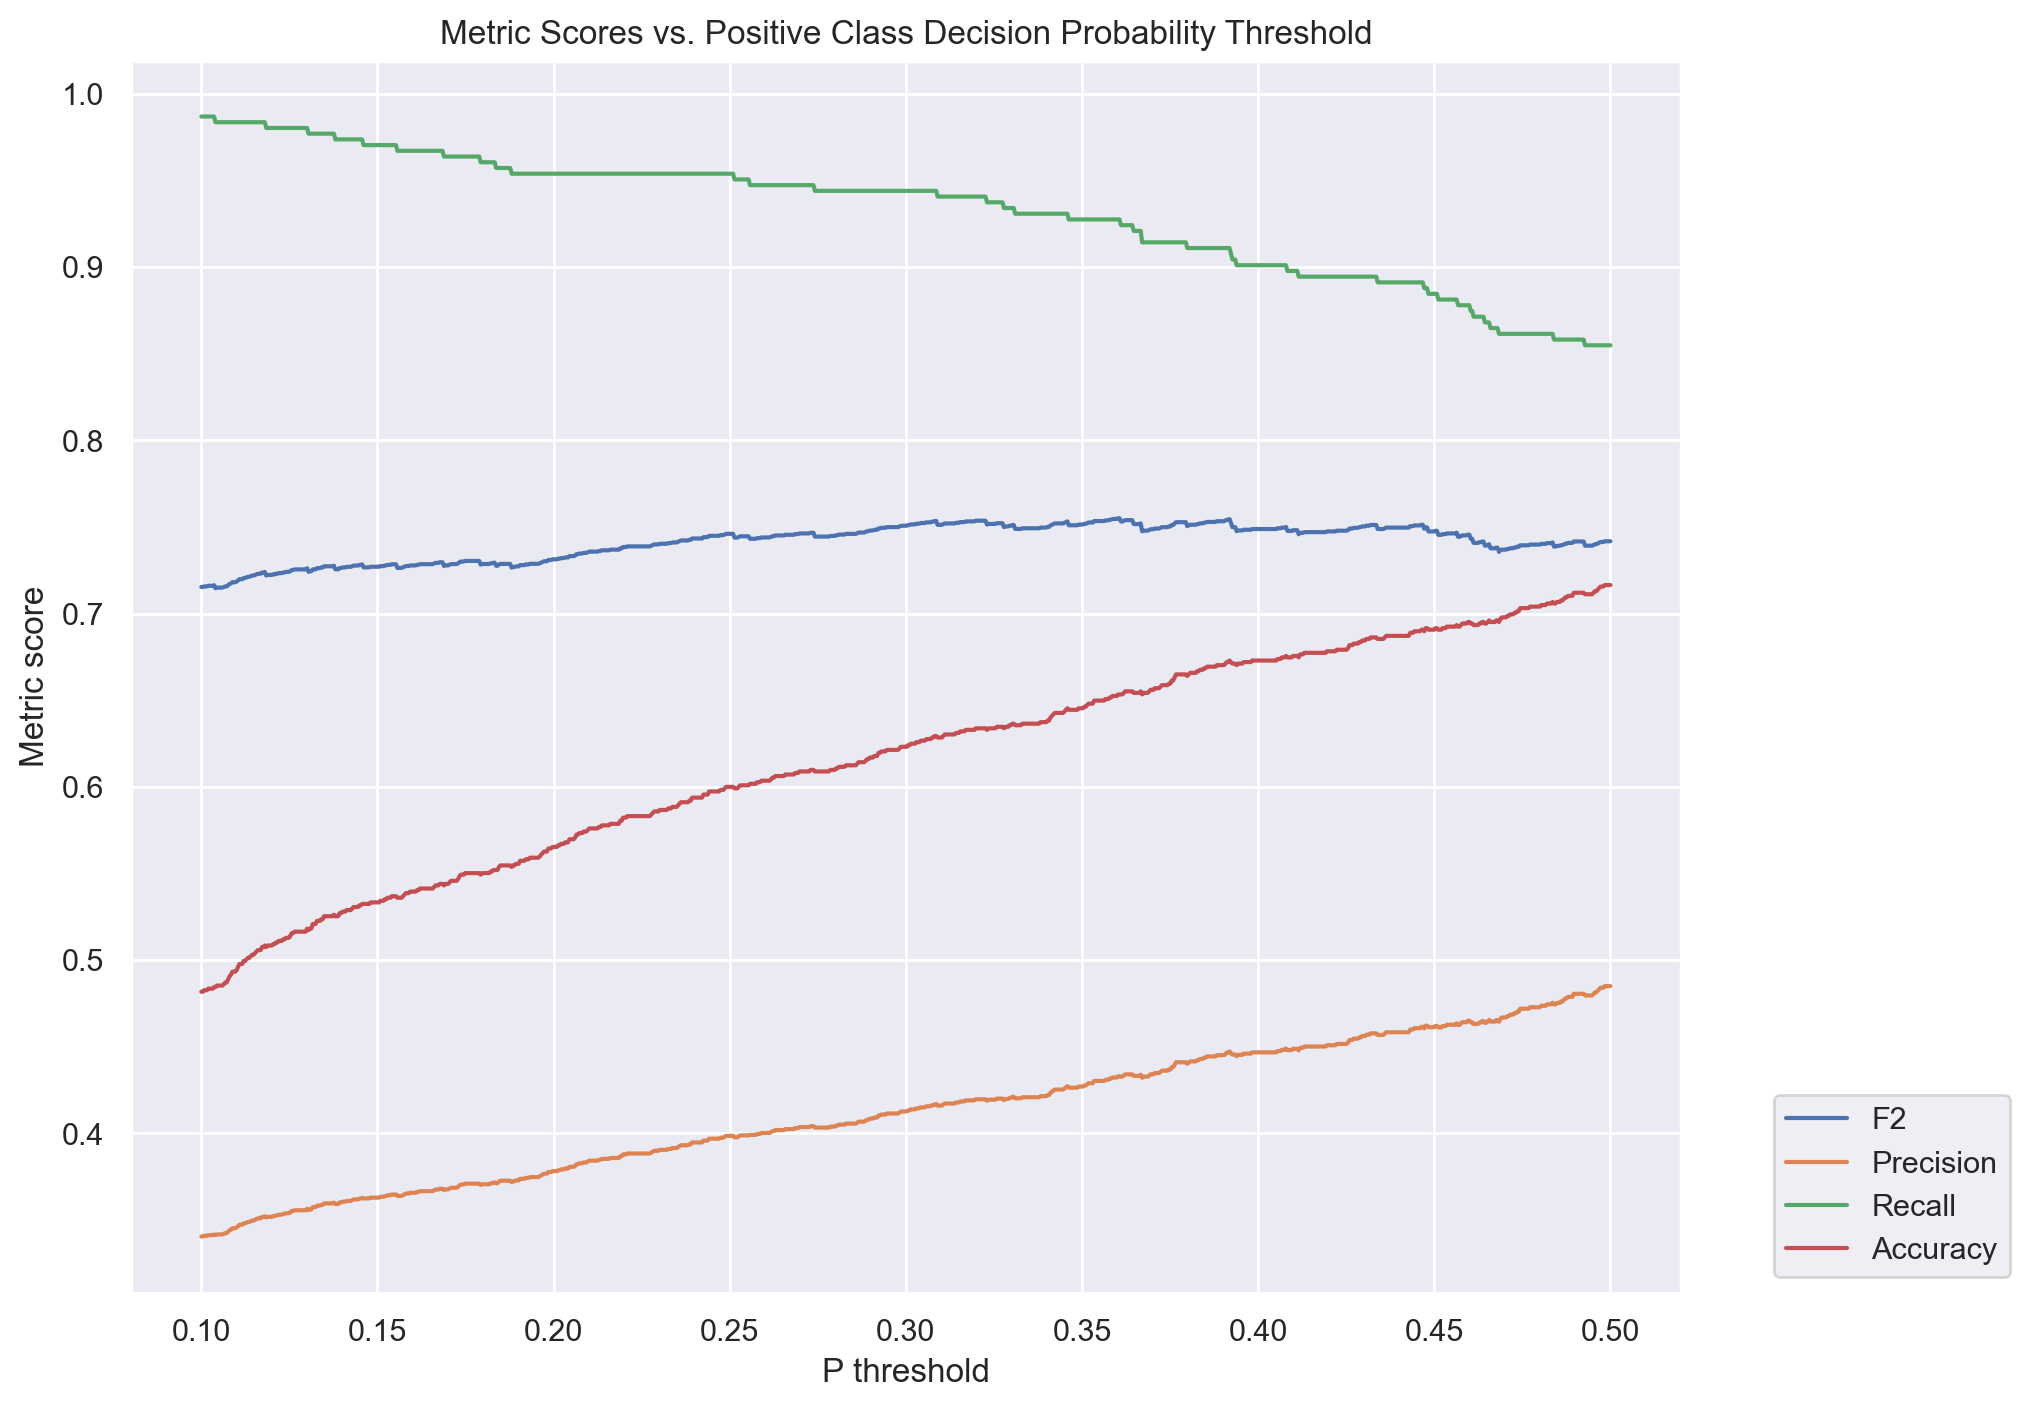

In [82]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = ada_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')


print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

ADASYN XGBoost best test F2 score 0.734 at prob decision threshold >= 0.193


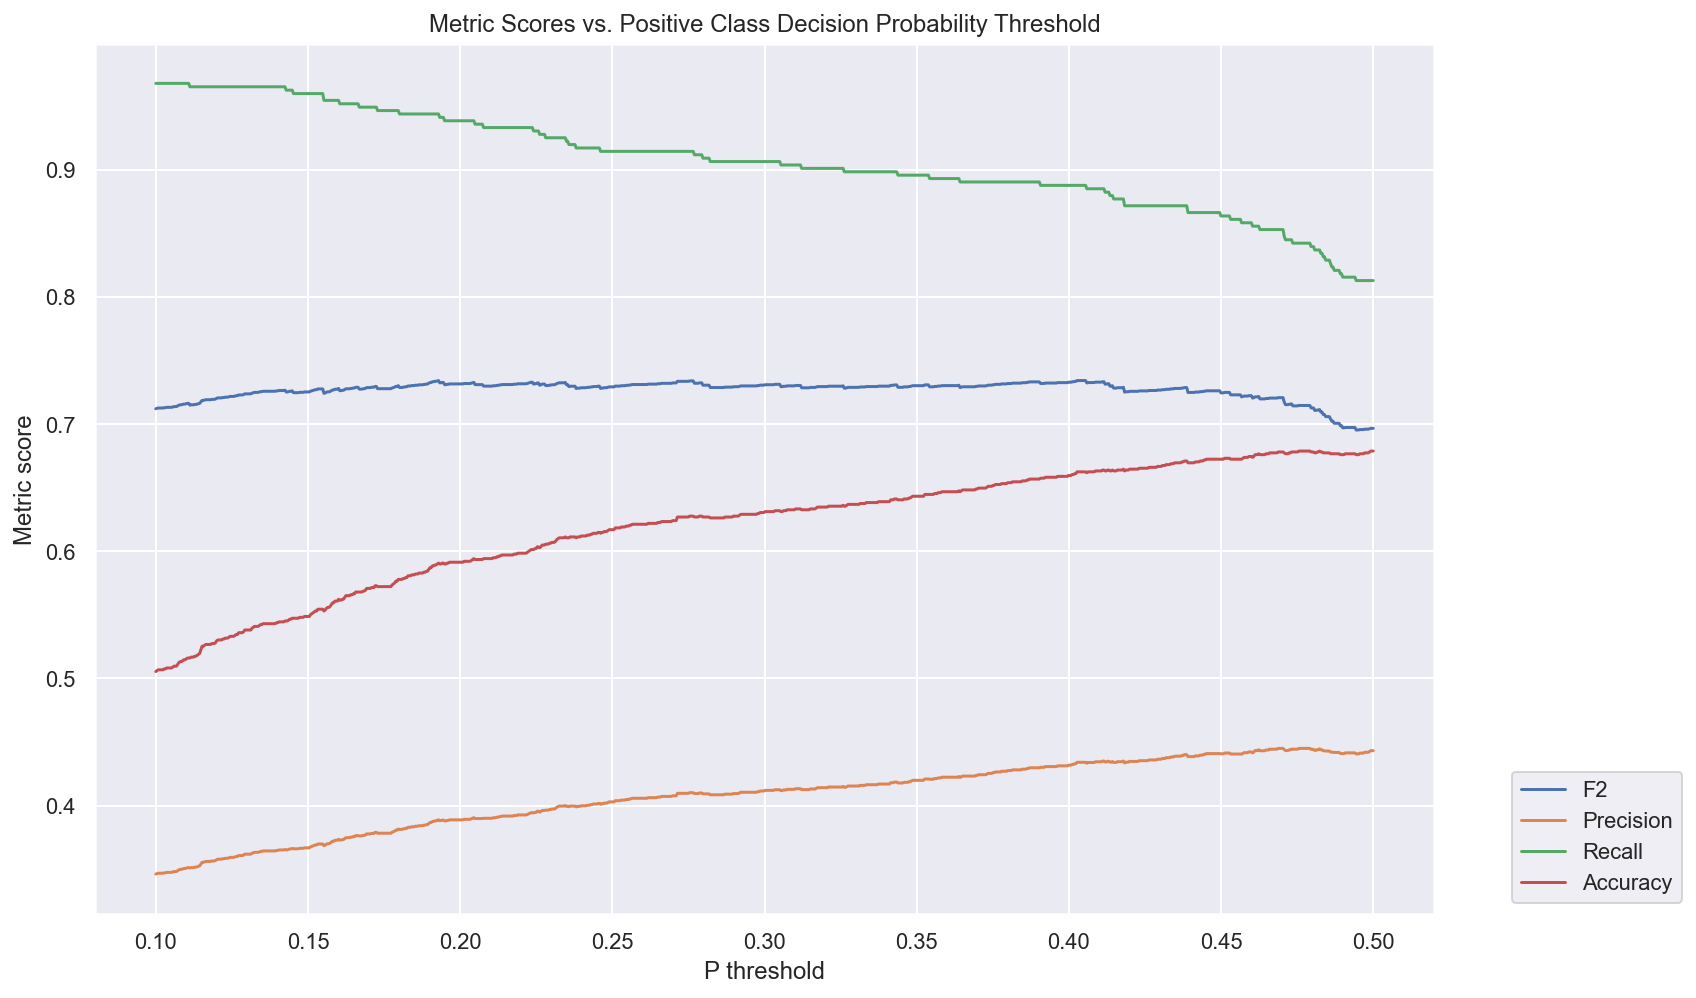

In [115]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = ada_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('ADASYN XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### Selected model is Random Forest

RF Hyper tunning

In [84]:
## First lets find optimal parameters
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(60,130,8)],
    'max_features': ['sqrt'],
    'max_depth': [8, 10,12,15],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,4,6,8,10,12],
    'bootstrap': [True, False],
    }
# Output: 

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=2, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = -1,
    cv = 5)

rf_grid.fit(x_train, 
            y_train,) 

rf_grid.best_params_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 12,
 'min_samples_split': 4,
 'n_estimators': 80}

In [85]:
test_preds=rf_grid.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, test_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, test_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, test_preds)

Val Recall score: 0.446524064171123 
Val F2 score: 0.47578347578347585 

 val confusion_matrix:


array([[941,  92],
       [207, 167]])

### we go ahead and find our thresh hold with the adjustment

Final RF Model best test F2 score 0.741 at prob decision threshold >= 0.152


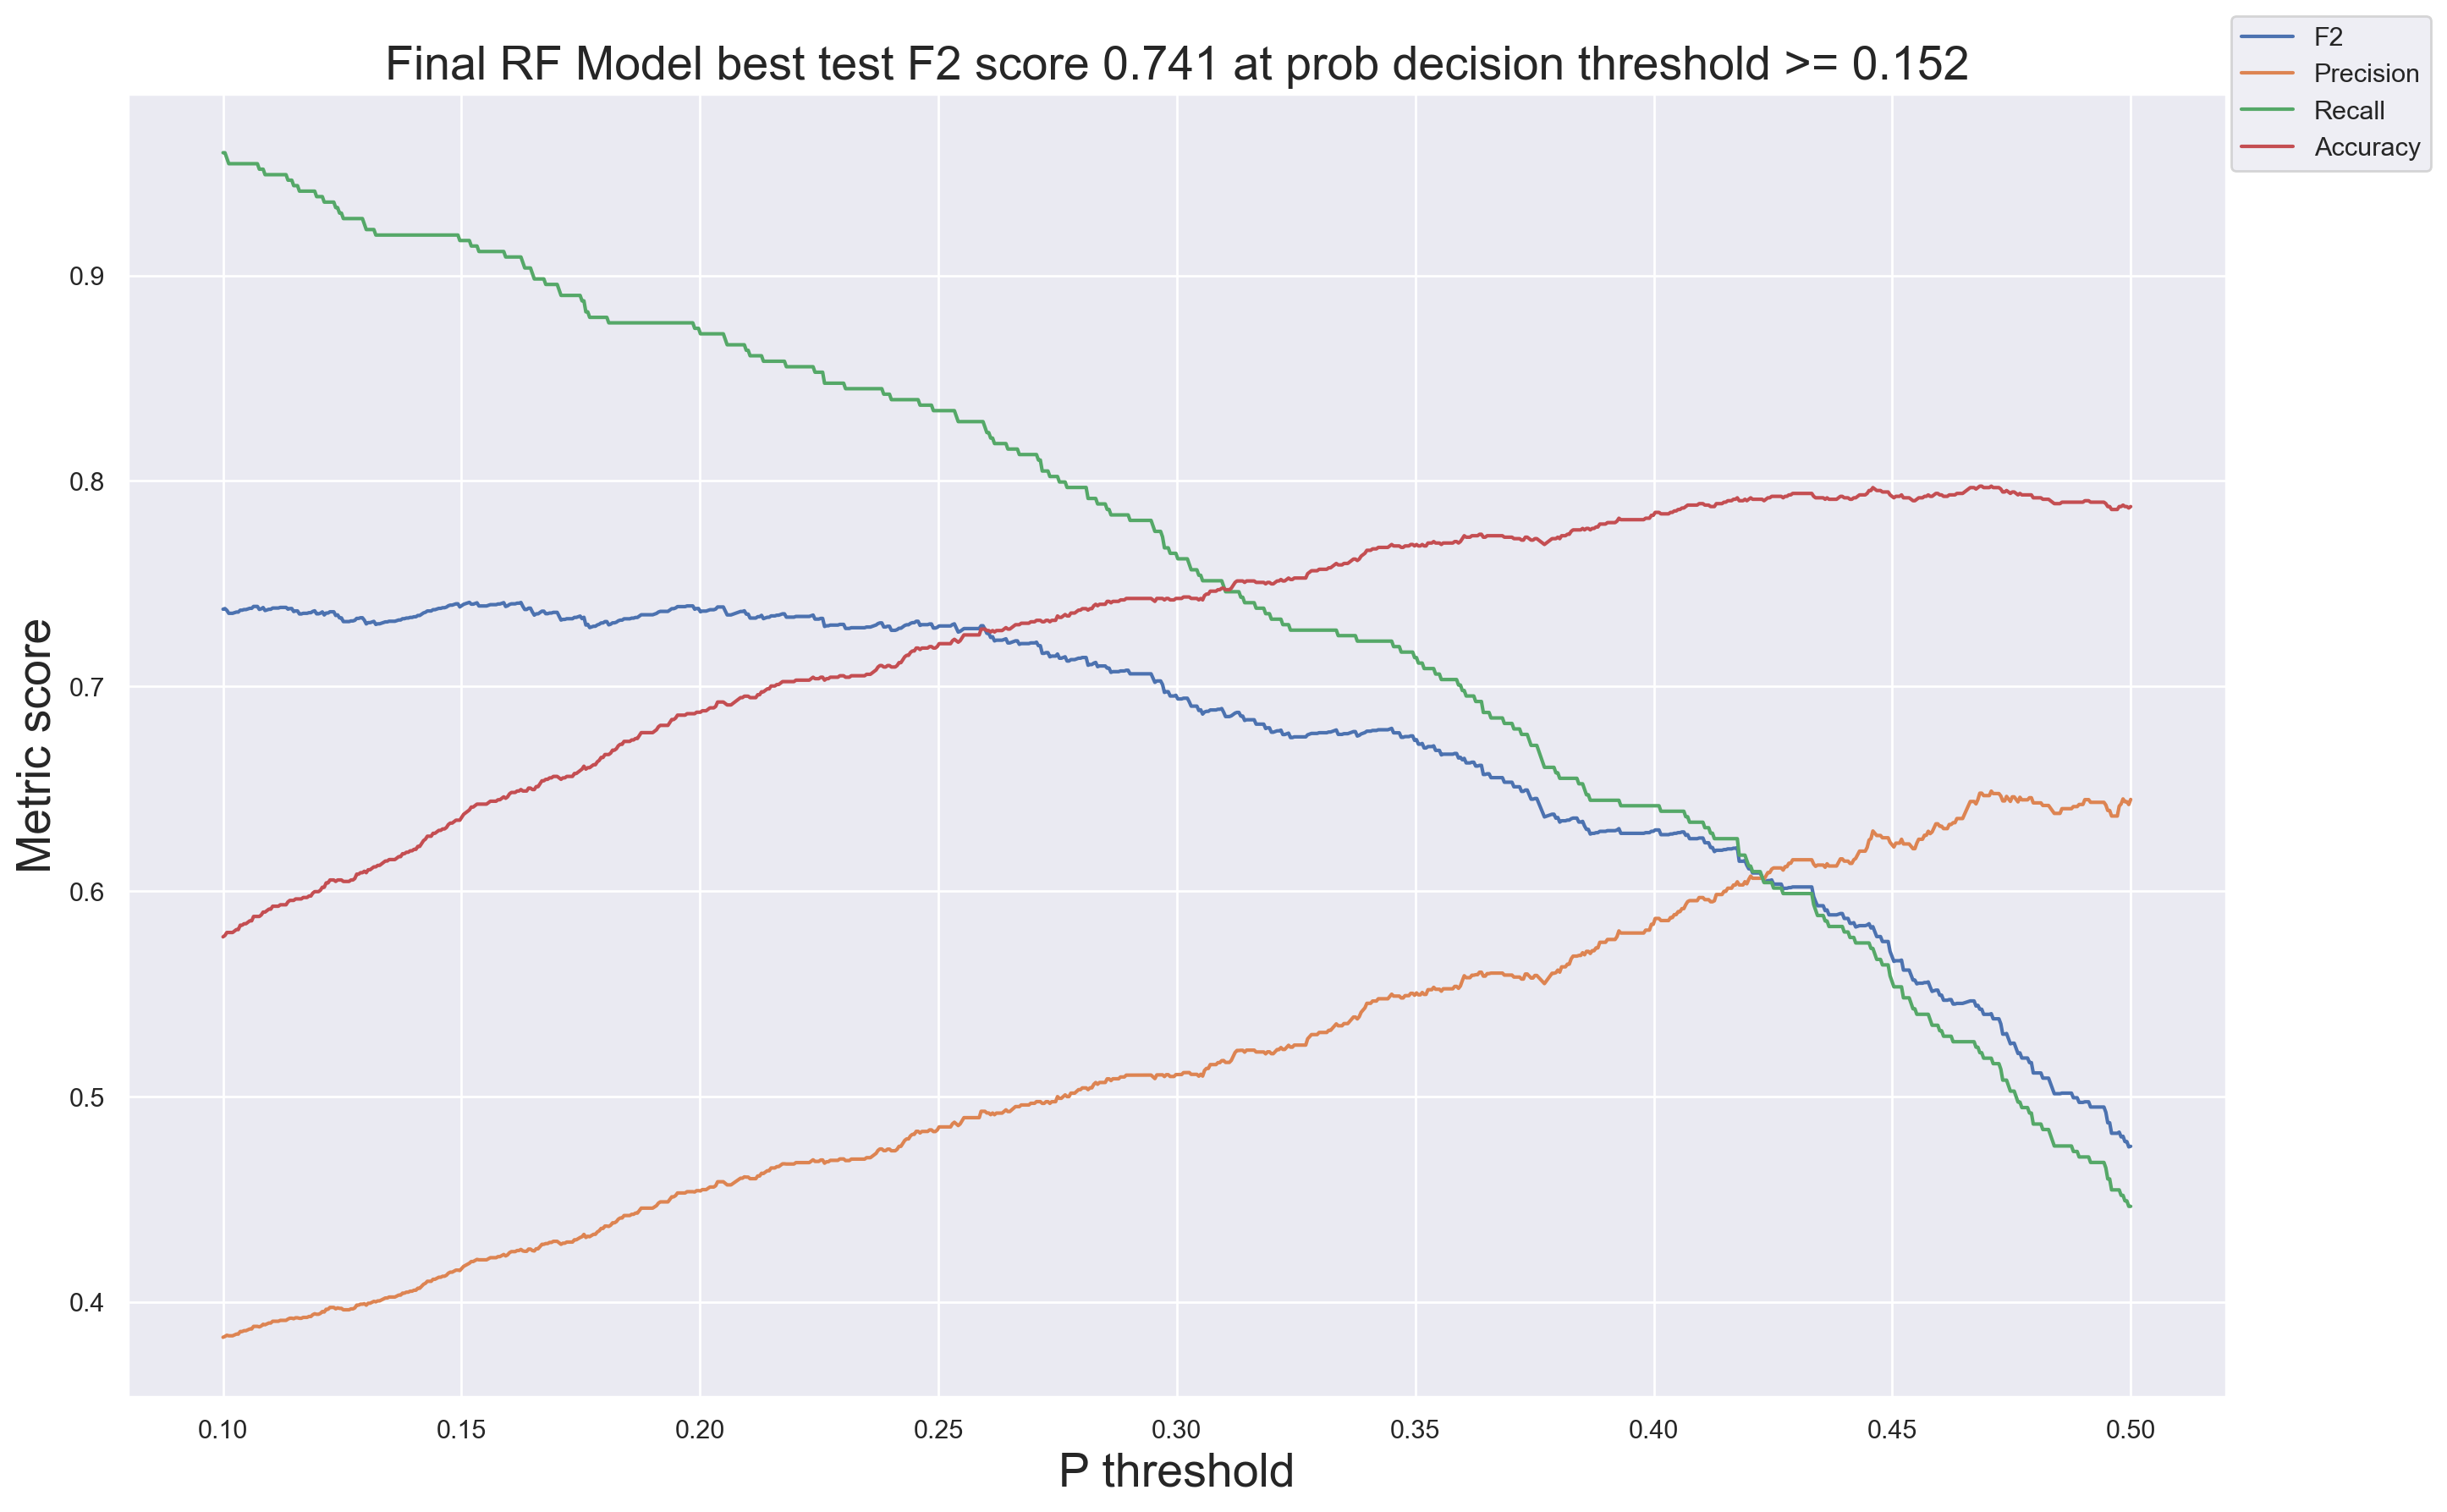

In [86]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_grid.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(16,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p), fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold', fontdict={'size': 20})
plt.ylabel('Metric score',fontdict={'size': 20})
# plt.savefig('./pics/rf_final.png')


print('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [106]:
# lets save our model
import pickle as pkl
with open("../models/rf_model.pkl", "wb") as f:
    pkl.dump(rf_grid, f)

In [ ]:
pkl.dump(le, "../models/le.pkl")
pkl.dump(rf_grid, "../models/le.pkl")

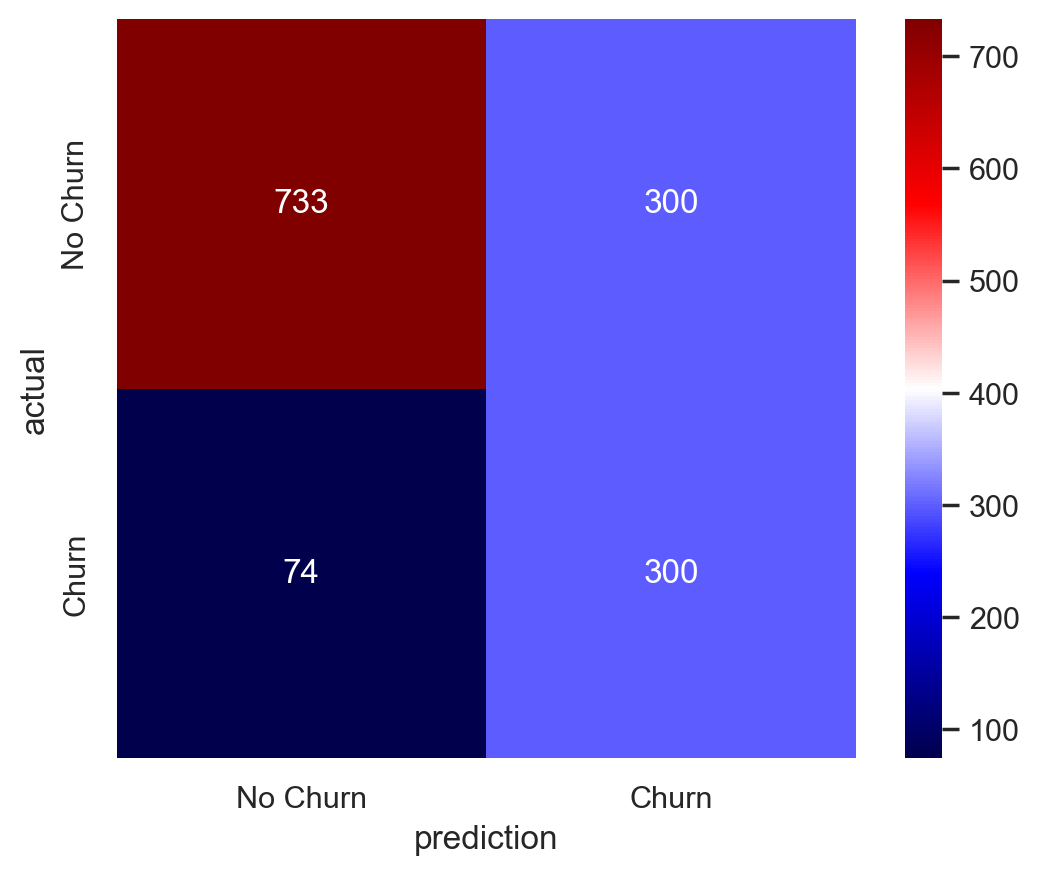

In [87]:
def make_confusion_matrix(model, threshold=0.275):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict_proba = (model.predict_proba(x_test)[:, 1] >= threshold)
    y_predict = model.predict(x_test)
    default_confusion = confusion_matrix(y_test, y_predict_proba)
    plt.figure(dpi=100)
    sns.heatmap(default_confusion, cmap='seismic', annot=True, square=True, fmt='d',
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    # plt.savefig('./pics/cmat.png')

make_confusion_matrix(rf_grid)

In [89]:
import pickle as pkl

In [91]:
def save_artifact(file, fname):
    with open(fname, mode='wb') as f:
        pkl.dump(file, f)

In [103]:
save_artifact(le, "../models/le.pkl")
save_artifact(rf_grid, "../models/rf_model.pkl")
save_artifact(features, "../models/features.pkl")
save_artifact(categorical_colummns, "../models/categorical_columns.pkl")

In [93]:
with open("../models/rf_model.pkl", "rb") as f:
    rf_model1 = pkl.load(f)

In [99]:
def load_artifact(fname):
    with open(fname, mode='rb') as f:
        return pkl.load(f)

In [100]:
f_model1 = load_artifact('../models/rf_model.pkl')

In [101]:
rf_model1.predict([x_test.iloc[1].values])

array([0])

In [95]:
rf_model1.predict_proba([x_test.iloc[1].values])[:,1]

array([0.0699025])

In [96]:
rf_model1.predict_proba([x_test.iloc[2]])[:, 1]

array([0.6167914])

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  tenure            7032 non-null   int64  


In [108]:
X.sample(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
3532,Male,No,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),71,100.20,7209.00
6511,Male,No,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,2,85.85,167.30
6703,Male,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,68,95.90,6503.20
1851,Female,Yes,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),38,57.15,2250.65
5274,Female,No,No,Yes,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,19,48.80,953.65
356,Female,Yes,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,16,54.10,889.00
3393,Female,No,No,No,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),42,78.45,3373.40
2071,Female,No,No,No,Yes,No,DSL,No,No,No,Yes,No,Yes,One year,No,Credit card (automatic),14,59.10,772.85
2812,Female,No,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),41,20.65,875.55
2964,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,65,109.30,7337.55


In [128]:
X.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [1]:
pwd

'/Users/bernie/Documents/Coding_stuff/Metis/DSML/Classification/customer-churn-project/notebooks'